In [ ]:
import numpy as np
import pandas as pd
import os
import re
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#PREPROCESS
data_1 = pd.read_json("/content/drive/MyDrive/sarcasm_dataset/Sarcasm_Headlines_Dataset.json", lines=True)

data_2 = pd.read_json("/content/drive/MyDrive/sarcasm_dataset/Sarcasm_Headlines_Dataset_v2.json", lines=True)
df =  pd.concat([data_1, data_2])

def clean_text(text):
    if isinstance(text, str):
      text = text.lower()

      pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
      text = pattern.sub('', text)
      text = " ".join(filter(lambda x:x[0]!='@', text.split()))
      emoji = re.compile("["
                            u"\U0001F600-\U0001FFFF"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            "]+", flags=re.UNICODE)

      text = emoji.sub(r'', text)
      text = text.lower()
      text = re.sub(r"i'm", "i am", text)
      text = re.sub(r"he's", "he is", text)
      text = re.sub(r"she's", "she is", text)
      text = re.sub(r"that's", "that is", text)
      text = re.sub(r"what's", "what is", text)
      text = re.sub(r"where's", "where is", text)
      text = re.sub(r"\'ll", " will", text)
      text = re.sub(r"\'ve", " have", text)
      text = re.sub(r"\'re", " are", text)
      text = re.sub(r"\'d", " would", text)
      text = re.sub(r"\'ve", " have", text)
      text = re.sub(r"won't", "will not", text)
      text = re.sub(r"don't", "do not", text)
      text = re.sub(r"did't", "did not", text)
      text = re.sub(r"can't", "can not", text)
      text = re.sub(r"it's", "it is", text)
      text = re.sub(r"couldn't", "could not", text)
      text = re.sub(r"have't", "have not", text)
      text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
      return text
    else:
      return ''


def CleanTokenize(df):
    head_lines = list()
    lines = df["headline"].values.tolist()

    for line in lines:
        line = clean_text(line)

        tokens = word_tokenize(str(line))
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        words = [w for w in words if not w in stop_words]
        head_lines.append(words)
    return head_lines

comment = CleanTokenize(df)
X = [' '.join(words) for words in comment]
y =  df['is_sarcastic'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

scaler = StandardScaler(with_mean=False)
X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_test_tfidf = scaler.transform(X_test_tfidf)



In [ ]:
json_file_path = '/content/drive/MyDrive/sarcasm_dataset/Sarcasm_Headlines_Dataset.json'

# Read the JSON file into a DataFrame
df1 = pd.read_json(json_file_path, lines=True)

# Display the DataFrame
print(df1.head(2))
print(len(df1))

                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
26709


In [ ]:
json_file_path = '/content/drive/MyDrive/sarcasm_dataset/Sarcasm_Headlines_Dataset_v2.json'

# Read the JSON file into a DataFrame
df2 = pd.read_json(json_file_path, lines=True)

# Display the DataFrame
print(df2.head(2))
print(len(df2))

   is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
28619


In [ ]:
result = pd.concat([df1, df2], axis=0)
print(result.head(2))
print(len(result))

                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
55328


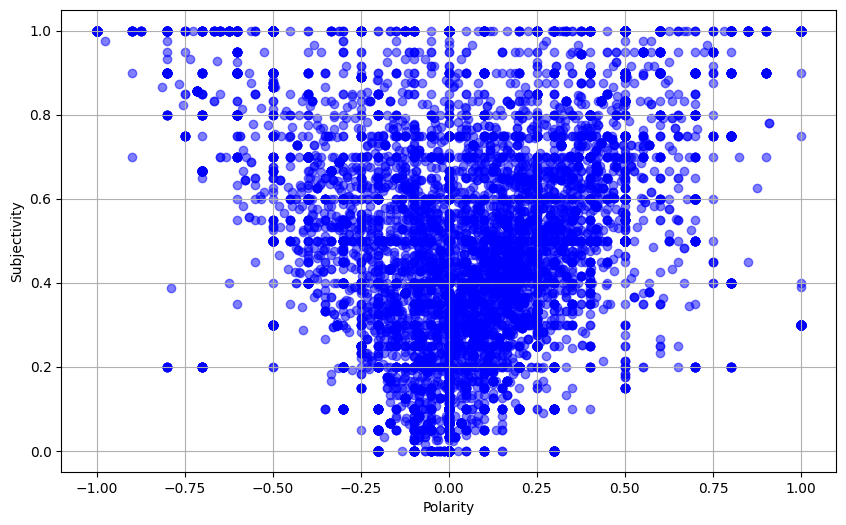

In [ ]:
from textblob import TextBlob

# Assuming df is your DataFrame containing the dataset
# If not, load the dataset using pd.read_json as shown in the previous response

# Calculate sentiment polarity and subjectivity for each headline
df1['polarity'] = df1['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
df1['subjectivity'] = df1['headline'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df1['polarity'], df1['subjectivity'], color='blue', alpha=0.5)
# plt.title('Sentiment Polarity vs Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid(True)


plt.savefig('sentiment_scatter_plot.jpeg')

plt.show()

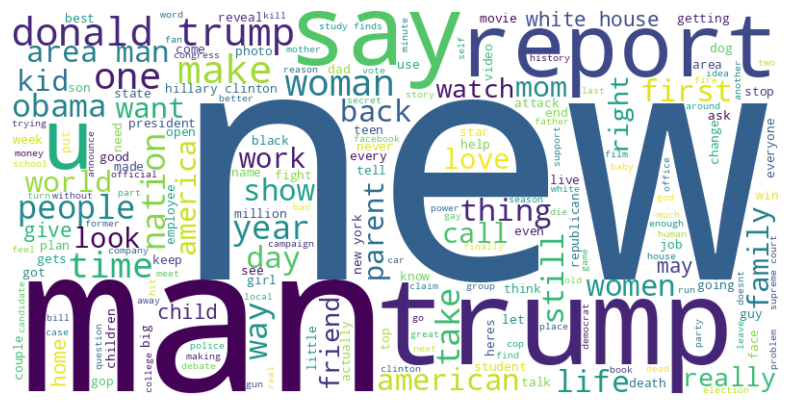

In [ ]:
from wordcloud import WordCloud

# Join the cleaned and tokenized words back into a single string
all_text = ' '.join([' '.join(words) for words in comment])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud.to_file("wordcloud.png")


Logistic Regression for sarcasm detection
Accuracy: 0.83
Confusion Matrix
[[5032  846]
 [1042 4146]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      5878
           1       0.83      0.80      0.81      5188

    accuracy                           0.83     11066
   macro avg       0.83      0.83      0.83     11066
weighted avg       0.83      0.83      0.83     11066



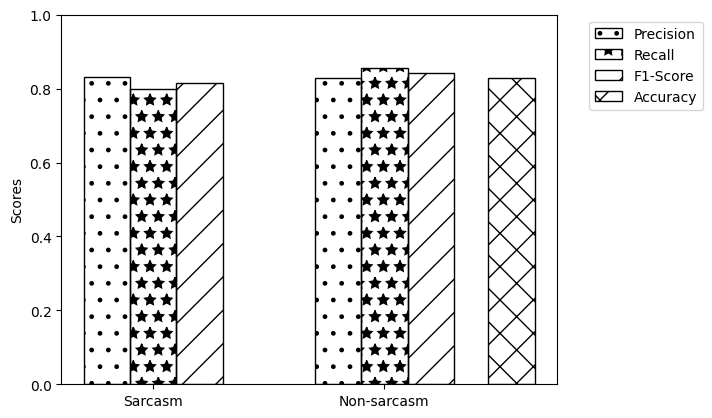

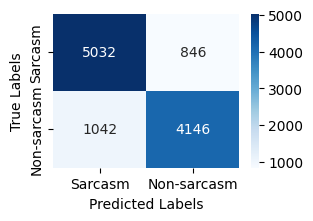

In [ ]:
#Logistic Regression

model = LogisticRegression(solver='liblinear', max_iter=1000000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Logistic Regression for sarcasm detection")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix")
c_lr=confusion_matrix(y_test,y_pred)
print(c_lr)
print(classification_report(y_test, y_pred))
class_report = classification_report(y_test, y_pred, target_names=["Non-sarcasm", "Sarcasm"], output_dict=True)

precision = [class_report["Sarcasm"]["precision"], class_report["Non-sarcasm"]["precision"]]
recall = [class_report["Sarcasm"]["recall"], class_report["Non-sarcasm"]["recall"]]
f1_score = [class_report["Sarcasm"]["f1-score"], class_report["Non-sarcasm"]["f1-score"]]

classes = ["Sarcasm", "Non-sarcasm"]

import matplotlib.pyplot as plt

width = 0.2
x = range(len(classes))

fig, ax = plt.subplots()

# Use hatch patterns to differentiate bars
ax.bar(x, precision, width, label='Precision', hatch='.', color='none', edgecolor='black')
ax.bar([i + width for i in x], recall, width, label='Recall', hatch='*', color='none', edgecolor='black')
ax.bar([i + 2 * width for i in x], f1_score, width, label='F1-Score', hatch='/', color='none', edgecolor='black')

# Use hatch patterns for the accuracy bar
ax.bar([1.75], [accuracy], width, hatch='x', color='none', edgecolor='black', label='Accuracy')

ax.set_ylim(0, 1)
ax.set_ylabel('Scores')
#ax.set_title('Classification Metrics')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(classes)

# Move the legend outside the plot area to avoid overlap
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('LR.jpeg', bbox_inches='tight')
plt.show()

plt.figure(figsize=(3, 2))
sns.heatmap(c_lr, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
# plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('c_LR.jpeg', bbox_inches='tight')
plt.show()
print()

Naive Bayes Multinomial for sarcasm detection
Accuracy: 0.79
Confusion Matrix
[[4674 1204]
 [1079 4109]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      5878
           1       0.77      0.79      0.78      5188

    accuracy                           0.79     11066
   macro avg       0.79      0.79      0.79     11066
weighted avg       0.79      0.79      0.79     11066



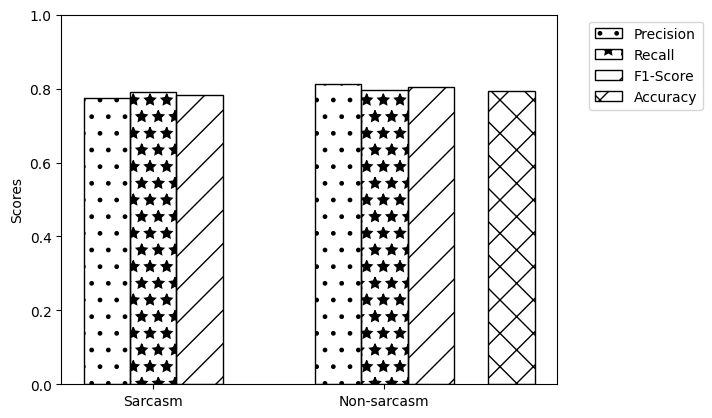

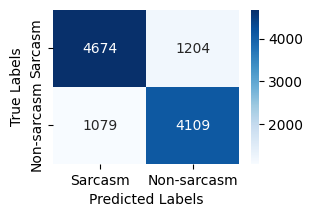

In [ ]:
#Naive Bayes Multinomial

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Naive Bayes Multinomial for sarcasm detection")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix")
c_NB=confusion_matrix(y_test,y_pred)
print(c_NB)
print(classification_report(y_test, y_pred))
class_report = classification_report(y_test, y_pred, target_names=["Non-sarcasm", "Sarcasm"], output_dict=True)

precision = [class_report["Sarcasm"]["precision"], class_report["Non-sarcasm"]["precision"]]
recall = [class_report["Sarcasm"]["recall"], class_report["Non-sarcasm"]["recall"]]
f1_score = [class_report["Sarcasm"]["f1-score"], class_report["Non-sarcasm"]["f1-score"]]

classes = ["Sarcasm", "Non-sarcasm"]
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

width = 0.2
x = range(len(classes))

fig, ax = plt.subplots()

# Use hatch patterns to differentiate bars
ax.bar(x, precision, width, label='Precision', hatch='.', color='none', edgecolor='black')
ax.bar([i + width for i in x], recall, width, label='Recall', hatch='*', color='none', edgecolor='black')
ax.bar([i + 2 * width for i in x], f1_score, width, label='F1-Score', hatch='/', color='none', edgecolor='black')

# Use hatch patterns for the accuracy bar
ax.bar([1.75], [accuracy], width, hatch='x', color='none', edgecolor='black', label='Accuracy')

ax.set_ylim(0, 1)
ax.set_ylabel('Scores')
#ax.set_title('Classification Metrics')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(classes)

# Move the legend outside the plot area to avoid overlap
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('NB.jpeg', bbox_inches='tight')
plt.show()


plt.figure(figsize=(3,2))
sns.heatmap(c_NB, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
# plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('c_NB.jpeg', bbox_inches='tight')
plt.show()
print()

Random Forest for sarcasm detection
Accuracy: 0.94
Confusion Matrix
[[5663  215]
 [ 417 4771]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5878
           1       0.96      0.92      0.94      5188

    accuracy                           0.94     11066
   macro avg       0.94      0.94      0.94     11066
weighted avg       0.94      0.94      0.94     11066



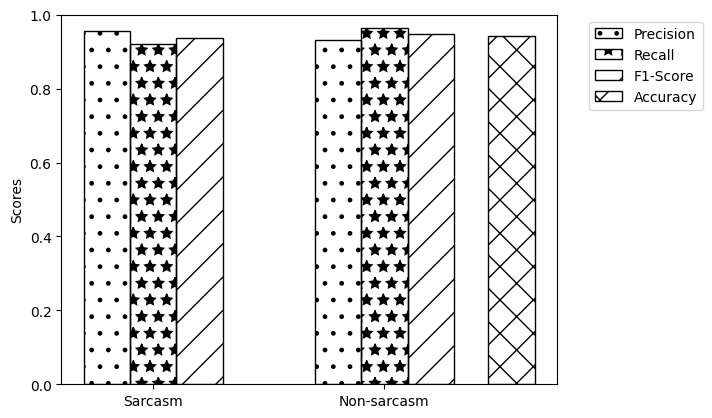

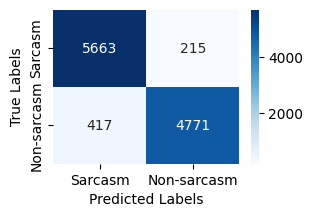

In [ ]:
#Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Random Forest for sarcasm detection")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix")
c_rf=confusion_matrix(y_test,y_pred)
print(c_rf)
print(classification_report(y_test, y_pred))
class_report = classification_report(y_test, y_pred, target_names=["Non-sarcasm", "Sarcasm"], output_dict=True)

precision = [class_report["Sarcasm"]["precision"], class_report["Non-sarcasm"]["precision"]]
recall = [class_report["Sarcasm"]["recall"], class_report["Non-sarcasm"]["recall"]]
f1_score = [class_report["Sarcasm"]["f1-score"], class_report["Non-sarcasm"]["f1-score"]]

classes = ["Sarcasm", "Non-sarcasm"]

import matplotlib.pyplot as plt

width = 0.2
x = range(len(classes))

fig, ax = plt.subplots()

# Use hatch patterns to differentiate bars
ax.bar(x, precision, width, label='Precision', hatch='.', color='none', edgecolor='black')
ax.bar([i + width for i in x], recall, width, label='Recall', hatch='*', color='none', edgecolor='black')
ax.bar([i + 2 * width for i in x], f1_score, width, label='F1-Score', hatch='/', color='none', edgecolor='black')

# Use hatch patterns for the accuracy bar
ax.bar([1.75], [accuracy], width, hatch='x', color='none', edgecolor='black', label='Accuracy')

ax.set_ylim(0, 1)
ax.set_ylabel('Scores')
#ax.set_title('Classification Metrics')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(classes)

# Move the legend outside the plot area to avoid overlap
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('RF.jpeg', bbox_inches='tight')
plt.show()


plt.figure(figsize=( 3,2))
sns.heatmap(c_rf, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
# plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('c_RF.jpeg', bbox_inches='tight')
plt.show()
print()

SVM for sarcasm detection
Accuracy: 0.90
Confusion Matrix
[[5467  411]
 [ 725 4463]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      5878
           1       0.92      0.86      0.89      5188

    accuracy                           0.90     11066
   macro avg       0.90      0.90      0.90     11066
weighted avg       0.90      0.90      0.90     11066



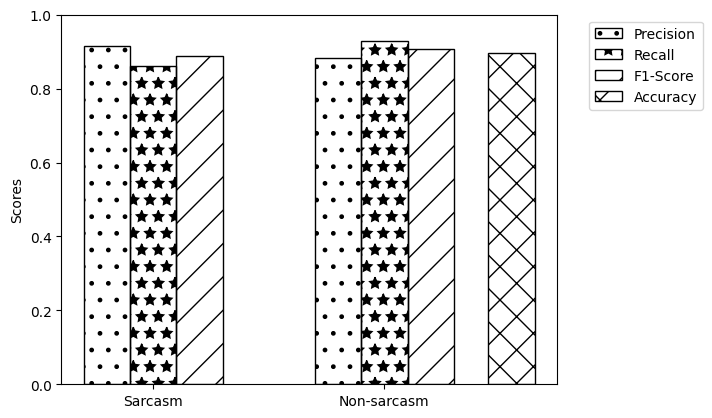

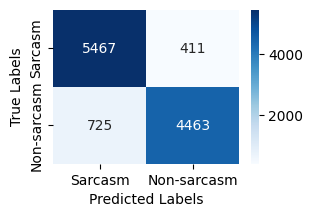

In [ ]:
#Support Vector Machine
clf = SVC()
clf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = clf.predict(X_test_tfidf)

# Evaluate the SVM model
accuracy = accuracy_score(y_test, y_pred)
print("SVM for sarcasm detection")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix")
c_svm=confusion_matrix(y_test,y_pred)
print(c_svm)
print(classification_report(y_test, y_pred))

class_report = classification_report(y_test, y_pred, target_names=["Non-sarcasm", "Sarcasm"], output_dict=True)

# Extract precision, recall, and F1-score
precision = [class_report["Sarcasm"]["precision"], class_report["Non-sarcasm"]["precision"]]
recall = [class_report["Sarcasm"]["recall"], class_report["Non-sarcasm"]["recall"]]
f1_score = [class_report["Sarcasm"]["f1-score"], class_report["Non-sarcasm"]["f1-score"]]

# Define the classes
classes = ["Sarcasm", "Non-sarcasm"]

# Create a bar chart
import matplotlib.pyplot as plt

width = 0.2
x = range(len(classes))

fig, ax = plt.subplots()

# Use hatch patterns to differentiate bars
ax.bar(x, precision, width, label='Precision', hatch='.', color='none', edgecolor='black')
ax.bar([i + width for i in x], recall, width, label='Recall', hatch='*', color='none', edgecolor='black')
ax.bar([i + 2 * width for i in x], f1_score, width, label='F1-Score', hatch='/', color='none', edgecolor='black')

# Use hatch patterns for the accuracy bar
ax.bar([1.75], [accuracy], width, hatch='x', color='none', edgecolor='black', label='Accuracy')

ax.set_ylim(0, 1)
ax.set_ylabel('Scores')
#ax.set_title('Classification Metrics')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(classes)

# Move the legend outside the plot area to avoid overlap
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('SVM.jpeg', bbox_inches='tight')
plt.show()


plt.figure(figsize=(3,2))
sns.heatmap(c_svm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
# plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('c_SVM.jpeg', bbox_inches='tight')
plt.show()
print()

Gaussian Naive Bayes for sarcasm detection
Accuracy: 0.76
Confusion Matrix
[[4107 1771]
 [ 860 4328]]
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      5878
           1       0.71      0.83      0.77      5188

    accuracy                           0.76     11066
   macro avg       0.77      0.77      0.76     11066
weighted avg       0.77      0.76      0.76     11066



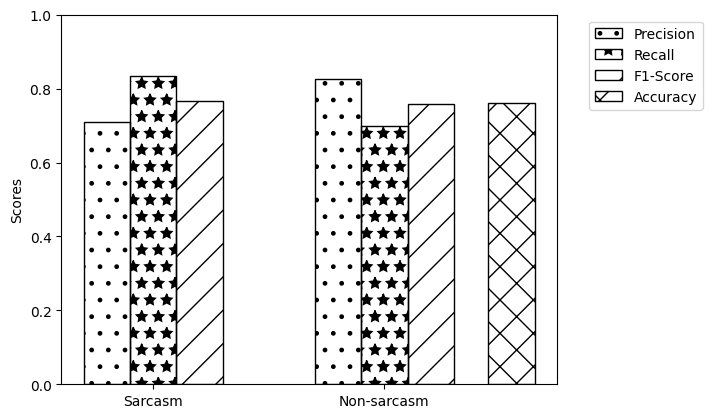

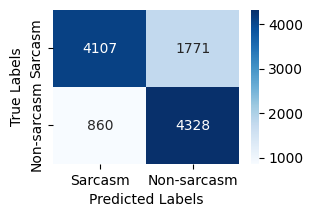

In [ ]:
#Gaussian Naive Bayes
clf = GaussianNB()
clf.fit(X_train_tfidf.toarray(), y_train)

# Make predictions
y_pred = clf.predict(X_test_tfidf.toarray())

# Evaluate the Gaussian Naive Bayes model
accuracy = accuracy_score(y_test, y_pred)
print("Gaussian Naive Bayes for sarcasm detection")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix")
c_gnb=confusion_matrix(y_test,y_pred)
print(c_gnb)
print(classification_report(y_test, y_pred))

class_report = classification_report(y_test, y_pred, target_names=["Non-sarcasm", "Sarcasm"], output_dict=True)

# Extract precision, recall, and F1-score
precision = [class_report["Sarcasm"]["precision"], class_report["Non-sarcasm"]["precision"]]
recall = [class_report["Sarcasm"]["recall"], class_report["Non-sarcasm"]["recall"]]
f1_score = [class_report["Sarcasm"]["f1-score"], class_report["Non-sarcasm"]["f1-score"]]

# Define the classes
classes = ["Sarcasm", "Non-sarcasm"]

# Create a bar chart
import matplotlib.pyplot as plt

width = 0.2
x = range(len(classes))

fig, ax = plt.subplots()

# Use hatch patterns to differentiate bars
ax.bar(x, precision, width, label='Precision', hatch='.', color='none', edgecolor='black')
ax.bar([i + width for i in x], recall, width, label='Recall', hatch='*', color='none', edgecolor='black')
ax.bar([i + 2 * width for i in x], f1_score, width, label='F1-Score', hatch='/', color='none', edgecolor='black')

# Use hatch patterns for the accuracy bar
ax.bar([1.75], [accuracy], width, hatch='x', color='none', edgecolor='black', label='Accuracy')

ax.set_ylim(0, 1)
ax.set_ylabel('Scores')
#ax.set_title('Classification Metrics')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(classes)

# Move the legend outside the plot area to avoid overlap
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('GNB.jpeg', bbox_inches='tight')
plt.show()


plt.figure(figsize=(3,2))
sns.heatmap(c_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
# plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('c_GNB.jpeg', bbox_inches='tight')
plt.show()
print()